In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [46]:
df = pd.read_csv(r'TSLA_prices.csv')
df.head(6)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,3.800,5.000,3.508,4.778,93831500,0,0.0
1,2010-06-30,5.158,6.084,4.660,4.766,85935500,0,0.0
2,2010-07-01,5.000,5.184,4.054,4.392,41094000,0,0.0
3,2010-07-02,4.600,4.620,3.742,3.840,25699000,0,0.0
4,2010-07-06,4.000,4.000,3.166,3.222,34334500,0,0.0
5,2010-07-07,3.280,3.326,2.996,3.160,34608500,0,0.0


In [47]:
df.shape

(2671, 8)

In [48]:
# Get around the most recent 2 years data
df = df[2001:]

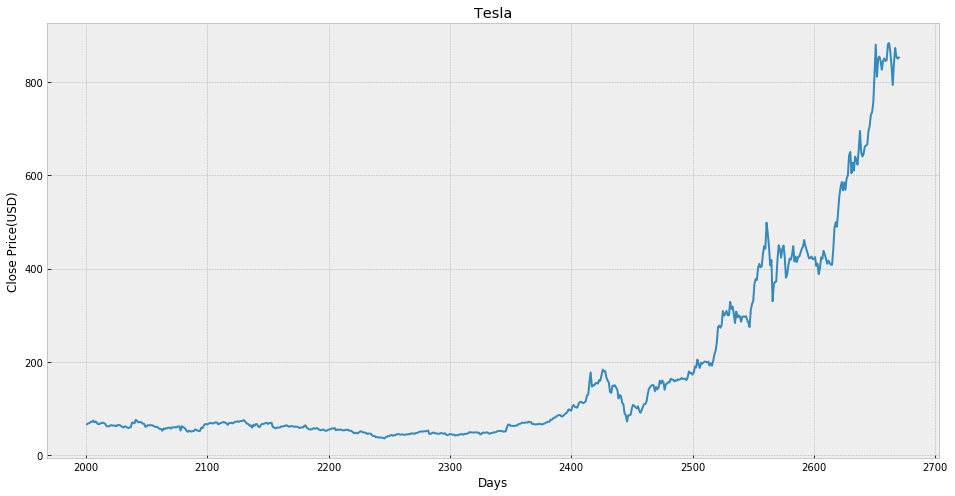

In [49]:
plt.figure(figsize=(16,8))
plt.title('Tesla')
plt.xlabel('Days')
plt.ylabel('Close Price(USD)')
plt.plot(df['Close'])
plt.show()

In [50]:
df = df[['Close']]

In [51]:
# Predict x days out of the future
future_days = 30

# Create a new column (target) shifted x units/days up
df['Prediction'] = df[['Close']].shift(-future_days)
df.head()

,Close,Prediction
2001,66.419998,59.486000
2002,68.554001,61.748001
2003,68.956001,61.330002
2004,71.543999,59.436001
2005,71.634003,58.034000


In [52]:
# Create features dataset X and convert to numpy array removing the Nan data 
# (last 30 days which we're going to predict)
X = np.array(df.drop(['Prediction'], axis=1))[:-future_days]
print(X)

[[ 66.41999817]
 [ 68.55400085]
 [ 68.95600128]
 [ 71.54399872]
 [ 71.63400269]
 [ 74.16600037]
 [ 70.51000214]
 [ 72.44400024]
 [ 69.5019989 ]
 [ 66.72599792]
 [ 66.60199738]
 [ 68.40000153]
 [ 68.90000153]
 [ 69.98600006]
 [ 68.58999634]
 [ 67.01399994]
 [ 62.17200089]
 [ 61.83200073]
 [ 61.77999878]
 [ 63.70199966]
 [ 64.4940033 ]
 [ 63.79199982]
 [ 63.34199905]
 [ 63.77399826]
 [ 62.02000046]
 [ 64.53800201]
 [ 64.76999664]
 [ 64.04599762]
 [ 62.7159996 ]
 [ 60.63999939]
 [ 59.48600006]
 [ 61.7480011 ]
 [ 61.33000183]
 [ 59.43600082]
 [ 58.0340004 ]
 [ 59.62799835]
 [ 60.16799927]
 [ 69.90799713]
 [ 69.63400269]
 [ 68.39800262]
 [ 75.91400146]
 [ 74.06800079]
 [ 70.48999786]
 [ 71.09799957]
 [ 71.28199768]
 [ 69.52799988]
 [ 67.73799896]
 [ 67.08999634]
 [ 61.09999847]
 [ 61.68799973]
 [ 64.37999725]
 [ 64.32800293]
 [ 64.01999664]
 [ 64.56400299]
 [ 63.85400009]
 [ 62.37200165]
 [ 61.0019989 ]
 [ 60.63000107]
 [ 60.33200073]
 [ 57.79000092]
 [ 56.14799881]
 [ 56.18999863]
 [ 52.64

In [53]:
# Create the target dataset y and convert to numpy array (only the last 30 days)
y = np.array(df['Prediction'])[:-future_days]
print(y)

[ 59.48600006  61.7480011   61.33000183  59.43600082  58.0340004
  59.62799835  60.16799927  69.90799713  69.63400269  68.39800262
  75.91400146  74.06800079  70.48999786  71.09799957  71.28199768
  69.52799988  67.73799896  67.08999634  61.09999847  61.68799973
  64.37999725  64.32800293  64.01999664  64.56400299  63.85400009
  62.37200165  61.0019989   60.63000107  60.33200073  57.79000092
  56.14799881  56.18999863  52.64799881  57.09999847  55.88800049
  58.10800171  57.89199829  59.04000092  58.9679985   56.99200058
  59.80400085  59.66600037  59.81999969  59.93600082  60.19800186
  61.91600037  61.50400162  52.95399857  62.13999939  60.20399857
  58.95999908  56.36600113  52.38999939  50.11199951  52.56000137
  51.37599945  50.44599915  51.75600052  51.91799927  55.31800079
  54.35599899  52.7820015   52.          52.18999863  58.82799911
  57.70000076  62.97200012  66.18000031  66.97000122  65.98000336
  67.46399689  68.85600281  69.28199768  68.27999878  68.21199799
  69.632003

In [54]:
# Split the data into 75% training and 25% testing
x_train, x_test, y_train, y_tst = train_test_split(X, y, test_size=0.25)

In [55]:
# Create models
# Decision Tree Regressor
tree = DecisionTreeRegressor().fit(x_train, y_train)

# Linear Regression
lr = LinearRegression().fit(x_train, y_train)

In [57]:
# Get the last x rows of the features dataset X
x_future = df.drop(['Prediction'], axis=1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[410.35998535],
       [417.13000488],
       [411.76000977],
       [408.5       ],
       [408.08999634],
       [441.60998535],
       [486.64001465],
       [499.26998901],
       [489.60998535],
       [521.84997559],
       [555.38000488],
       [574.        ],
       [585.76000977],
       [567.59997559],
       [584.76000977],
       [568.82000732],
       [593.38000488],
       [599.03997803],
       [641.76000977],
       [649.88000488],
       [604.47998047],
       [627.07000732],
       [609.98999023],
       [639.83001709],
       [633.25      ],
       [622.77001953],
       [655.90002441],
       [695.        ],
       [649.85998535],
       [640.34002686]])

In [58]:
# Tree Prediction
tree_prediction = tree.predict(x_future)
print(tree_predict)
print()

# Linear Regression Prediction
lr_prediction = lr.predict(x_future)
print(lr_predict)

[645.97998047 430.82998657 663.69000244 694.7800293  694.7800293
 705.66998291 729.77001953 446.6499939  755.97998047 816.03997803
 880.02001953 811.19000244 849.44000244 854.40997314 849.44000244
 826.15997314 844.54998779 880.79998779 852.22998047 846.64001465
 880.79998779 883.09002686 864.15997314 835.42999268 793.5300293
 839.80999756 846.64001465 854.69000244 849.98999023 852.22998047]

[531.07349331 539.99620521 532.91868954 528.62208038 528.08170608
 572.26019086 631.60861317 648.25459507 635.5229583  678.01443756
 722.20615517 746.74683061 762.2462215  738.31176277 760.92824718
 739.91973327 772.28917939 779.74887866 836.05278351 846.75472857
 786.91866219 816.69173751 794.18071357 833.50910272 824.83680916
 811.02446401 854.68895972 906.22172352 846.72834334 834.1812825 ]


In [59]:
X.shape

(640, 1)

E:\Users\lo485\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


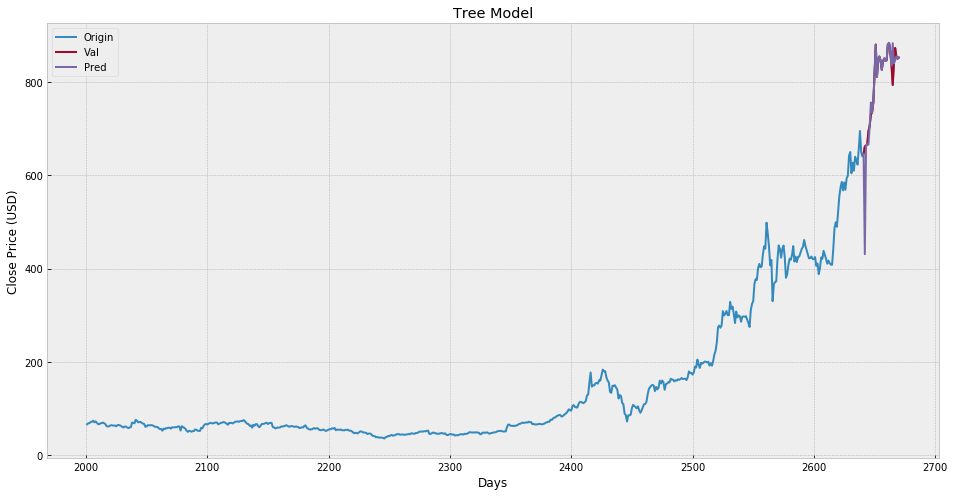

In [63]:
# Visualize the data
predictions = tree_prediction

valid = df[X.shape[0]:] # last 30 days true data
valid['Prediction'] = predictions
plt.figure(figsize=(16,8))
plt.title('Tree Model')
plt.xlabel('Days')
plt.ylabel('Close Price (USD)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Origin', 'Val', 'Pred'])
plt.show()

E:\Users\lo485\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


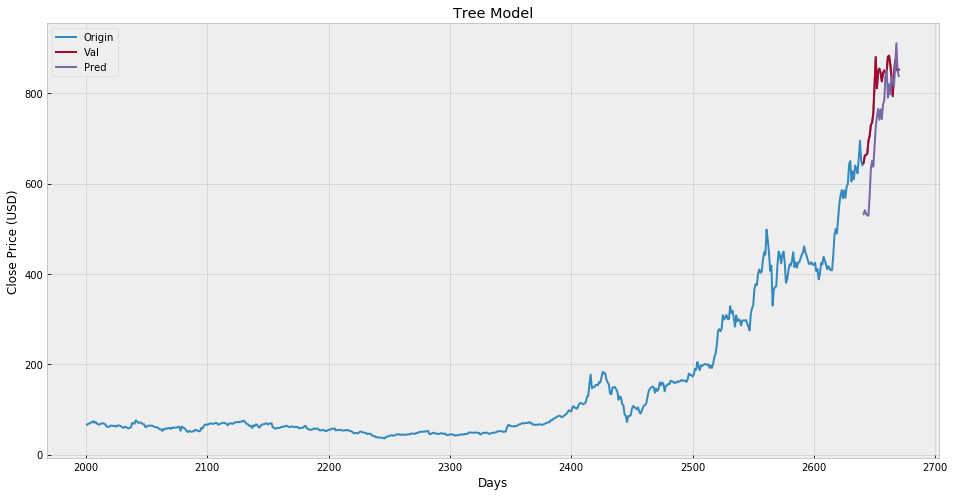

In [64]:
# Visualize the data
predictions = lr_prediction

valid = df[X.shape[0]:] # last 30 days true data
valid['Prediction'] = predictions
plt.figure(figsize=(16,8))
plt.title('Tree Model')
plt.xlabel('Days')
plt.ylabel('Close Price (USD)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Origin', 'Val', 'Pred'])
plt.show()